## Outliers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_raw = pd.read_csv('../Data/housing.csv')

In [4]:
df_raw.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_raw.shape

(20640, 10)

(array([1.7525e+04, 2.5580e+03, 3.7200e+02, 1.0300e+02, 4.9000e+01,
        1.6000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([2.00000e+00, 3.93380e+03, 7.86560e+03, 1.17974e+04, 1.57292e+04,
        1.96610e+04, 2.35928e+04, 2.75246e+04, 3.14564e+04, 3.53882e+04,
        3.93200e+04]),
 <BarContainer object of 10 artists>)

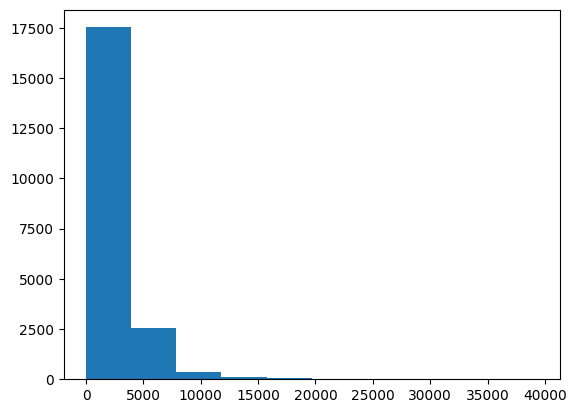

In [6]:
plt.hist(df_raw['total_rooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28127164490>,
 'caps': [<matplotlib.lines.Line2D at 0x281276ab5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x281276a91d0>],
 'medians': [<matplotlib.lines.Line2D at 0x281276b4bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x281276b5610>],
 'means': []}

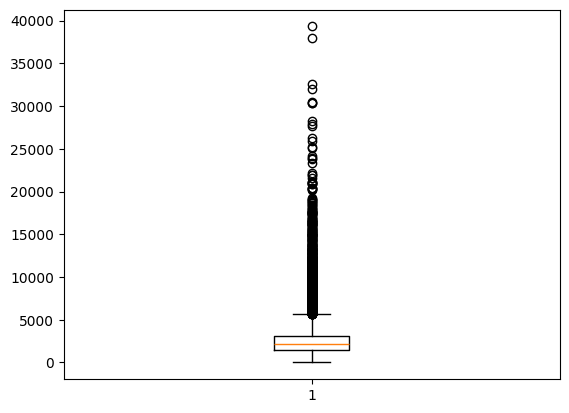

In [7]:
plt.boxplot(df_raw['total_rooms'])

> Tạo hàm tự động xác định và loại bỏ outliers bằng phương pháp STD

In [8]:
def find_outliers_std(data):
    mean_data = np.mean(data)
    std_data = np.std(data)
    limit = 3 * std_data
    lower = mean_data - limit
    upper = mean_data + limit
    return np.where((data > upper) | (data < lower))[0]

In [21]:
outliers_index = find_outliers_std(df_raw['total_rooms'].values)

In [22]:
df_cleaned = df_raw.drop(index=outliers_index).reset_index(drop=True)

In [23]:
df_cleaned.shape

(20267, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x2812bc85d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2812bc878d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2812bc85fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2812bc98990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2812bc99210>],
 'means': []}

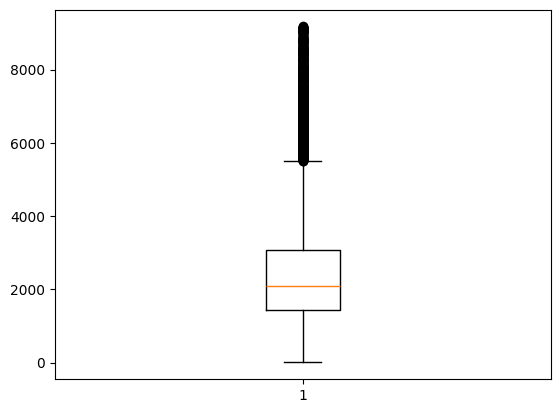

In [24]:
plt.boxplot(df_cleaned['total_rooms'])

> Xác định và loại bỏ outliers bằng phương pháp IQR

In [33]:
def find_outliers_iqr(data):
    q25 = np.percentile(data,25)
    q75 = np.percentile(data,75)
    iqr = q75 - q25

    upper = q75 + iqr * 1.5
    lower = q25 - iqr * 1.5
    
    return np.where((data > upper) | (data < lower))[0]

In [34]:
outliers_index = find_outliers_iqr(df_raw['total_rooms'].values)

In [35]:
df_cleaned = df_raw.drop(index=outliers_index).reset_index(drop=True)

In [28]:
df_cleaned.shape

(19353, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x2812be4ee90>,
 'caps': [<matplotlib.lines.Line2D at 0x2812be3b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2812be4e790>],
 'medians': [<matplotlib.lines.Line2D at 0x2812be60f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2812be61890>],
 'means': []}

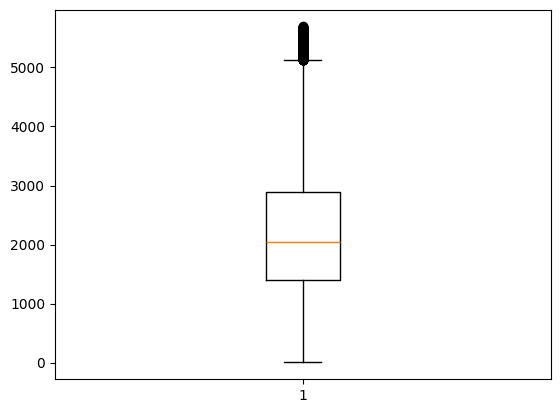

In [29]:
plt.boxplot(df_cleaned['total_rooms'])

> Sử dụng Z-Score

In [36]:
def find_outliers_by_zscore(data):
    mean_dt = np.mean(data)
    std_dt = np.std(data)
    z_scores = np.abs((data - mean_dt)/std_dt)

    threshold = 3
    outliers = z_scores > threshold
    outliers_count = outliers.sum()
    print('Number of outlier values: ', outliers_count)
    return np.where(z_scores > threshold)[0]

In [37]:
outliers_index = find_outliers_by_zscore(df_raw['total_rooms'].values)

Number of outlier values:  373


In [38]:
df_cleaned = df_raw.drop(index=outliers_index).reset_index(drop=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2812bf0bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2812bf0ad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2812e6fae10>],
 'medians': [<matplotlib.lines.Line2D at 0x2812bf09d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2812bf09690>],
 'means': []}

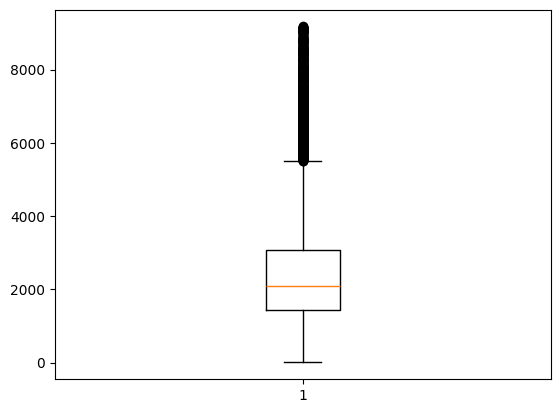

In [39]:
plt.boxplot(df_cleaned['total_rooms'])

## DỮ LIỆU HẠNG MỤC

<Axes: >

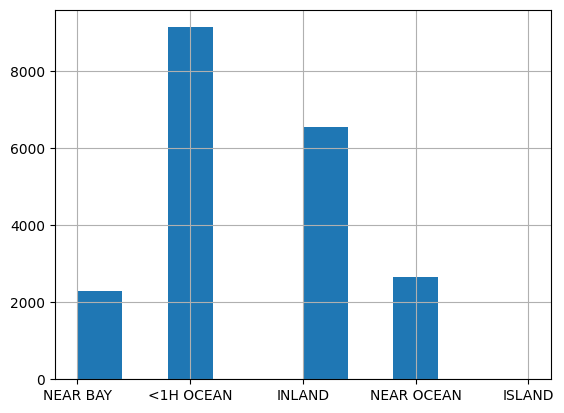

In [40]:
df_raw["ocean_proximity"].hist()

Text(0.5, 1.0, 'NOT ISLAND')

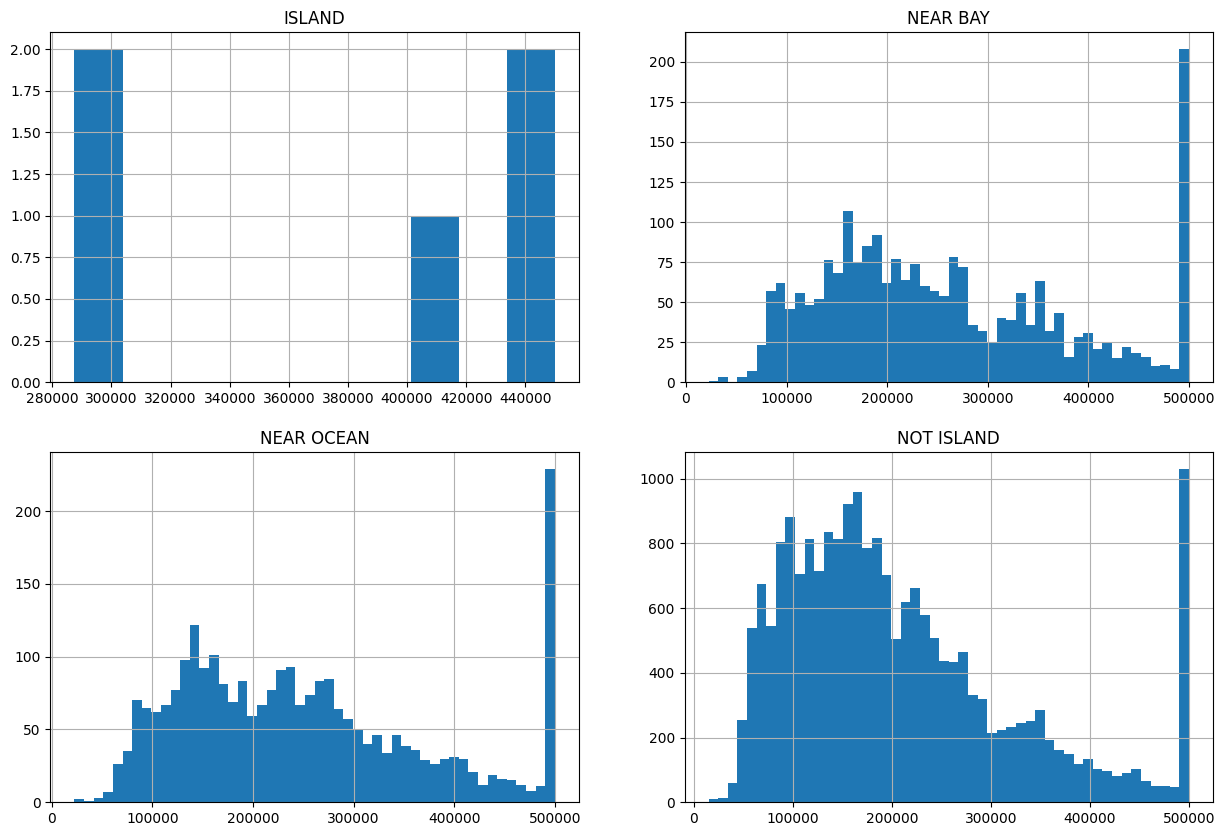

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10));
df_raw[df_raw["ocean_proximity"] == "ISLAND"]["median_house_value"].hist(ax=axes[0][0])
axes[0][0].set_title("ISLAND")
df_raw[df_raw["ocean_proximity"] == "NEAR BAY"]["median_house_value"].hist(bins=50, ax=axes[0][1])
axes[0][1].set_title("NEAR BAY")
df_raw[df_raw["ocean_proximity"] == "NEAR OCEAN"]["median_house_value"].hist(bins=50, ax=axes[1][0])
axes[1][0].set_title("NEAR OCEAN")
df_raw[df_raw["ocean_proximity"] != "ISLAND"]["median_house_value"].hist(bins=50, ax=axes[1][1])
axes[1][1].set_title("NOT ISLAND")

<Axes: >

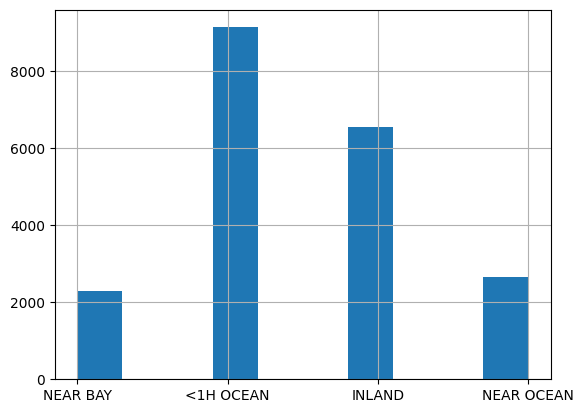

In [43]:
df_raw[df_raw["ocean_proximity"] == "ISLAND"] = "NEAR BAY"
df_raw["ocean_proximity"].hist()